In [1]:
import re
import numpy as np
import string

In [2]:
STOP_WORDS = ['a', 'an', 'the', 'is', 'are', 'was', 'were', 'be', 'will', 'and']
window = 2
def preprocess(text:str,
              punctuations = string.punctuation,
                stop_words = STOP_WORDS)->list:
    '''
    method to clean the text of punctutations and unimportant words
    '''
    
    #clean urls (https://text,http://text, or www.text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # clean html elements ( < text in here>)
    text = re.sub(r'<.*?', '', text)
    
    # standardize all the text to lowercase
    text = text.lower()
    mod_text = ''
    
    # remove punctuations
    for c in text:
        if c not in punctuations:
            mod_text += c
    #clean whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # remove stop words
    split_words = []
    for word in mod_text.split():
        if word not in stop_words:
            split_words.append(word)
            
    return split_words

In [3]:
test_text = 'Hi, My name is Krishna , ... >?'

In [4]:
preprocess(test_text)

['hi', 'my', 'name', 'krishna']

In [5]:
def create_vocabulary(text: list) -> dict:
    '''
    creates a unique word vocabulary from the corpus text (dict: word -> index)
    '''
    
    words = list(set(text))
    words.sort()
    
    vocabulary = {}
    for idx, word in enumerate(words):
        vocabulary[word] = idx
        
    return vocabulary
    
    

In [6]:
create_vocabulary(preprocess(test_text))

{'hi': 0, 'krishna': 1, 'my': 2, 'name': 3}

In [7]:
def euclidean_dist( vec1: np.array, vec2: np.array) -> float:
    '''
    returns the euclidean distance between two vectors. 
    '''
    
    return np.sqrt(np.sum((vec1 - vec2)**2))

In [8]:
import pandas as pd
texts = pd.read_csv('input/sample.csv')
texts = [x for x in texts['text']]
texts



['The future king is the prince',
 'Daughter is the princess ',
 'Son is the prince',
 'Only a man can be a king ',
 'Only a woman can be a queen',
 'The princess will be a queen',
 'Queen and king rule the realm',
 'The prince is a strong man',
 'The princess is a beautiful woman ',
 'The royal family is the king and queen and their children',
 'Prince is only a boy now',
 'A boy will be a man']

In [9]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:
   
    # Cleaning the text
    text = preprocess(text)

    # Appending to the all text list
    all_text .extend(text)

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(1, window + 1):
            # Getting the context that is ahead by *window* words
            if i + w  < len(text): 
                word_lists.append([word] + [text[(i + w)]])
            # Getting the context that is behind by *window* words    
            if i - w >= 0:
                word_lists.append([word] + [text[(i - w)]])

In [10]:
word_lists[:5]

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king']]

In [11]:
all_text[:5]

['future', 'king', 'prince', 'daughter', 'princess']

In [12]:
vocabulary = create_vocabulary(all_text)
vocabulary

{'beautiful': 0,
 'boy': 1,
 'can': 2,
 'children': 3,
 'daughter': 4,
 'family': 5,
 'future': 6,
 'king': 7,
 'man': 8,
 'now': 9,
 'only': 10,
 'prince': 11,
 'princess': 12,
 'queen': 13,
 'realm': 14,
 'royal': 15,
 'rule': 16,
 'son': 17,
 'strong': 18,
 'their': 19,
 'woman': 20}

In [13]:
from tqdm import tqdm

In [14]:
from scipy import sparse

In [15]:
#number of words in vocabulary
n_words = len(vocabulary)
n_words

21

In [16]:
# list of all the unique words in vocabulary
words = list(vocabulary.keys())
words

['beautiful',
 'boy',
 'can',
 'children',
 'daughter',
 'family',
 'future',
 'king',
 'man',
 'now',
 'only',
 'prince',
 'princess',
 'queen',
 'realm',
 'royal',
 'rule',
 'son',
 'strong',
 'their',
 'woman']

In [17]:
#create X and Y matrices
X = []
Y = []

In [18]:
for idx,word in tqdm(enumerate(word_lists)):
    main_word_index = vocabulary[word[0]]
    context_word_index = vocabulary[word[1]]
    
    #row placeholders
    X_row = [0] * n_words
    Y_row = [0] * n_words
    
    # create one-hot row
    X_row[main_word_index] = 1
    Y_row[context_word_index] = 1
    
    X.append(X_row)
    Y.append(Y_row)

84it [00:00, 218155.75it/s]


In [19]:
len(X)

84

In [20]:
# # Converting the matrices into a sparse format because the vast majority of the data are 0s
# X = sparse.csr_matrix(X)
# Y = sparse.csr_matrix(Y)

In [21]:
X

[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1,

In [22]:
X = np.asarray(X)
Y = np.asarray(Y)

In [23]:
type(X)

numpy.ndarray

In [24]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
from keras.models import Input, Model
from keras.layers import Dense

In [26]:
#size of embedding
embed_size = 2

In [27]:
X.shape

(84, 21)

In [28]:
#build the architecture
inp = Input(shape = (X.shape[1],))
x = Dense(units = embed_size, activation = 'linear')(inp)
y = Dense(units = Y.shape[1], activation = 'softmax')(x)
model = Model(inputs = inp, outputs = y)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')


2022-02-19 22:25:50.810083: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# fit the model with your data
model.fit(
    x = X,
    y = Y, 
    batch_size = 256, 
    epochs = 1000
)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 1s/step - loss: 3.0483
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.0473
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 3.0463
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 3.0453
Epoch 5/1000
1/1 [==============================] - 0s 13ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.9641
Epoch 91/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.9632
Epoch 92/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9622
Epoch 93/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.9613
Epoch 94/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.9604
Epoch 95/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9594
Epoch 96/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9585
Epoch 97/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.9576
Epoch 98/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9566
Epoch 99/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.9557
Epoch 100/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.9547
Epoch 101/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.9538
Epoch 102/1000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step - loss: 2.8666
Epoch 191/1000
1/1 [==============================] - 0s 23ms/step - loss: 2.8656
Epoch 192/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.8646
Epoch 193/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8636
Epoch 194/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.8626
Epoch 195/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.8616
Epoch 196/1000
1/1 [==============================] - ETA: 0s - loss: 2.860 - 0s 20ms/step - loss: 2.8606
Epoch 197/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.8596
Epoch 198/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.8586
Epoch 199/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.8576
Epoch 200/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.8566
Epoch 201/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.8556
Epoch 202/1000


1/1 [==============================] - 0s 11ms/step - loss: 2.7662
Epoch 291/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.7652
Epoch 292/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.7642
Epoch 293/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.7632
Epoch 294/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.7622
Epoch 295/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.7612
Epoch 296/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.7602
Epoch 297/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.7592
Epoch 298/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.7582
Epoch 299/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.7572
Epoch 300/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.7562
Epoch 301/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.7552
Epoch 302/1000
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 2.6674
Epoch 392/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.6665
Epoch 393/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.6655
Epoch 394/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.6646
Epoch 395/1000
1/1 [==============================] - 0s 14ms/step - loss: 2.6637
Epoch 396/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.6627
Epoch 397/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.6618
Epoch 398/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.6609
Epoch 399/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.6600
Epoch 400/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.6590
Epoch 401/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.6581
Epoch 402/1000
1/1 [==============================] - 0s 24ms/step - loss: 2.6572
Epoch 403/1000
1/1 [====================

1/1 [==============================] - 0s 7ms/step - loss: 2.5814
Epoch 492/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.5806
Epoch 493/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.5798
Epoch 494/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.5790
Epoch 495/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.5783
Epoch 496/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.5775
Epoch 497/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5767
Epoch 498/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5760
Epoch 499/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.5752
Epoch 500/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5744
Epoch 501/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.5737
Epoch 502/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.5729
Epoch 503/1000
1/1 [====================

1/1 [==============================] - ETA: 0s - loss: 2.511 - 0s 12ms/step - loss: 2.5116
Epoch 592/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5110
Epoch 593/1000
1/1 [==============================] - 0s 15ms/step - loss: 2.5104
Epoch 594/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.5098
Epoch 595/1000
1/1 [==============================] - 0s 22ms/step - loss: 2.5092
Epoch 596/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.5086
Epoch 597/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.5080
Epoch 598/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.5073
Epoch 599/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.5067
Epoch 600/1000
1/1 [==============================] - 0s 115ms/step - loss: 2.5061
Epoch 601/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.5055
Epoch 602/1000
1/1 [==============================] - 0s 22ms/step - loss: 2.5049
Epoch 60

1/1 [==============================] - 0s 62ms/step - loss: 2.4566
Epoch 692/1000
1/1 [==============================] - 0s 63ms/step - loss: 2.4561
Epoch 693/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.4557
Epoch 694/1000
1/1 [==============================] - 0s 66ms/step - loss: 2.4552
Epoch 695/1000
1/1 [==============================] - 0s 83ms/step - loss: 2.4547
Epoch 696/1000
1/1 [==============================] - 0s 15ms/step - loss: 2.4542
Epoch 697/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.4537
Epoch 698/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.4532
Epoch 699/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.4528
Epoch 700/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.4523
Epoch 701/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.4518
Epoch 702/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.4513
Epoch 703/1000
1/1 [=============

1/1 [==============================] - 0s 10ms/step - loss: 2.4133
Epoch 792/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.4130
Epoch 793/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.4126
Epoch 794/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.4122
Epoch 795/1000
1/1 [==============================] - 0s 42ms/step - loss: 2.4118
Epoch 796/1000
1/1 [==============================] - 0s 41ms/step - loss: 2.4114
Epoch 797/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.4111
Epoch 798/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.4107
Epoch 799/1000
1/1 [==============================] - 0s 115ms/step - loss: 2.4103
Epoch 800/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.4099
Epoch 801/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.4095
Epoch 802/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.4092
Epoch 803/1000
1/1 [============

1/1 [==============================] - 0s 9ms/step - loss: 2.3793
Epoch 891/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.3790
Epoch 892/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.3787
Epoch 893/1000
1/1 [==============================] - 0s 15ms/step - loss: 2.3784
Epoch 894/1000
1/1 [==============================] - 0s 43ms/step - loss: 2.3781
Epoch 895/1000
1/1 [==============================] - 0s 14ms/step - loss: 2.3778
Epoch 896/1000
1/1 [==============================] - 0s 14ms/step - loss: 2.3775
Epoch 897/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.3771
Epoch 898/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.3768
Epoch 899/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.3765
Epoch 900/1000
1/1 [==============================] - 0s 44ms/step - loss: 2.3762
Epoch 901/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.3759
Epoch 902/1000
1/1 [==============

1/1 [==============================] - 0s 56ms/step - loss: 2.3514
Epoch 991/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.3511
Epoch 992/1000
1/1 [==============================] - 0s 24ms/step - loss: 2.3509
Epoch 993/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.3506
Epoch 994/1000
1/1 [==============================] - 0s 14ms/step - loss: 2.3503
Epoch 995/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.3501
Epoch 996/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.3498
Epoch 997/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.3496
Epoch 998/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.3493
Epoch 999/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.3491
Epoch 1000/1000
1/1 [==============================] - 0s 19ms/step - loss: 2.3488


In [30]:
# get the model weights at first layer, which is the word embedding

weights = model.get_weights()[0]

In [31]:
weights

array([[-1.1035545 , -0.9905313 ],
       [ 0.54034567,  0.8738416 ],
       [ 1.1154895 , -0.22600964],
       [-0.0769126 , -1.3276925 ],
       [-1.0400649 , -0.75447494],
       [ 1.2646583 , -1.0155194 ],
       [ 0.94531935,  0.2728128 ],
       [-0.02149715, -0.11720873],
       [ 0.37544453,  1.0727677 ],
       [ 1.2970784 ,  1.026297  ],
       [-1.0152906 ,  1.4679434 ],
       [ 0.79162806,  0.9062909 ],
       [-0.4327818 , -1.1980656 ],
       [-1.119326  , -0.5865073 ],
       [-0.25308925, -0.8591312 ],
       [-0.28581223, -0.8283014 ],
       [ 0.9789226 , -1.3559599 ],
       [ 1.1095613 ,  1.1740732 ],
       [ 1.302936  ,  0.8585377 ],
       [ 0.4692696 , -1.2646602 ],
       [-0.26241454, -0.27546182]], dtype=float32)

In [32]:
words

['beautiful',
 'boy',
 'can',
 'children',
 'daughter',
 'family',
 'future',
 'king',
 'man',
 'now',
 'only',
 'prince',
 'princess',
 'queen',
 'realm',
 'royal',
 'rule',
 'son',
 'strong',
 'their',
 'woman']

In [33]:
# create embedding dictionary

embedding_dict = {}

for word in words:
    embedding_dict[word] = weights[vocabulary[word]]

In [34]:
embedding_dict

{'beautiful': array([-1.1035545, -0.9905313], dtype=float32),
 'boy': array([0.54034567, 0.8738416 ], dtype=float32),
 'can': array([ 1.1154895 , -0.22600964], dtype=float32),
 'children': array([-0.0769126, -1.3276925], dtype=float32),
 'daughter': array([-1.0400649 , -0.75447494], dtype=float32),
 'family': array([ 1.2646583, -1.0155194], dtype=float32),
 'future': array([0.94531935, 0.2728128 ], dtype=float32),
 'king': array([-0.02149715, -0.11720873], dtype=float32),
 'man': array([0.37544453, 1.0727677 ], dtype=float32),
 'now': array([1.2970784, 1.026297 ], dtype=float32),
 'only': array([-1.0152906,  1.4679434], dtype=float32),
 'prince': array([0.79162806, 0.9062909 ], dtype=float32),
 'princess': array([-0.4327818, -1.1980656], dtype=float32),
 'queen': array([-1.119326 , -0.5865073], dtype=float32),
 'realm': array([-0.25308925, -0.8591312 ], dtype=float32),
 'royal': array([-0.28581223, -0.8283014 ], dtype=float32),
 'rule': array([ 0.9789226, -1.3559599], dtype=float32),
 

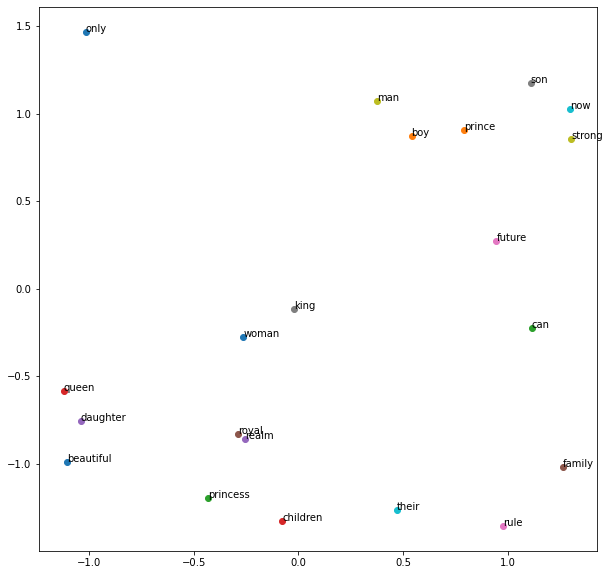

In [35]:
# plot the figure
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

for word in words:
    x, y = embedding_dict[word]
    plt.scatter(x,y)
    plt.annotate(word, (x,y))

In [55]:
def find_similar_n(word:str, embedding_dict:dict, top_n = 10)-> list:
    '''
    returns a list of top 10 closes words to the input
    '''
    
    similarity_dict = {}
    word_vector = embedding_dict.get(word, [])
    
    if len(word_vector) > 0:
        for key, val in embedding_dict.items():
            if key!= word:
                distance = euclidean_dist(word_vector, val)
                similarity_dict[key] = distance
                
#     return sorted(similarity_dict)[0:top_n]
    return sorted(similarity_dict.items(), key = lambda x: x[1], reverse = True)[0:top_n]

In [56]:
find_similar_n('king', embedding_dict)

[('only', 1.8709177),
 ('now', 1.74535),
 ('son', 1.7165961),
 ('strong', 1.6450543),
 ('rule', 1.5922765),
 ('family', 1.5688078),
 ('beautiful', 1.3905181),
 ('prince', 1.3071817),
 ('man', 1.2544348),
 ('their', 1.2479972)]